# Question 1
**Note:** TA mentioned that I can make a decision tree without the features in prediction data (sod, hemo). Relevant because `DecisionTreeClassifier` does not accept NaN values (plus, the way she analyzed the data involved ignoring the nodes with sod/hemo, so might as well not use them?)

**Note 2:** TA mentioned that the tree is not necessarily hierarchical, and all nodes should result in same result regardless of starting point. However, the prediction data includes values which contradict the decision tree - why? is this normal? TA doesn't know.

***E.g.:** Person A has pcv <= 39.5 (ckd = 1), but also has age <= 60.5 (ckd = 0).*


<br><br>

### 1. Decision tree - all features

In [7]:
# Import packages
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# Import data
data = pd.read_csv('kidney_disease.csv')
print(data)

# Get independent/dependent variable(s)
X, y = data.drop(['ckd'], axis=1), data[['ckd']]
#print(X) #X is data, without 'ckd' column
#print(y) #y is 'ckd' column only

# Get names of features as list
feature_names = list(X.columns)
#print(feature_names)

      age    bp    sod  pot  hemo  pcv     wc   rc  ckd
0    48.0  70.0  111.0  2.5  11.2   32   6700  3.9    1
1    60.0  90.0  142.0  3.2  12.2   39   7800  4.4    1
2    53.0  90.0  114.0  3.7   9.5   29  12100  3.7    1
3    63.0  70.0  131.0  4.2  10.8   32   4500  3.8    1
4    68.0  70.0  138.0  5.8   9.7   28  12200  3.4    1
..    ...   ...    ...  ...   ...  ...    ...  ...  ...
221  55.0  80.0  150.0  4.9  15.7   47   6700  4.9    0
222  42.0  70.0  141.0  3.5  16.5   54   7800  6.2    0
223  12.0  80.0  137.0  4.4  15.8   49   6600  5.4    0
224  17.0  60.0  135.0  4.9  14.2   51   7200  5.9    0
225  58.0  80.0  141.0  3.5  15.8   53   6800  6.1    0

[226 rows x 9 columns]


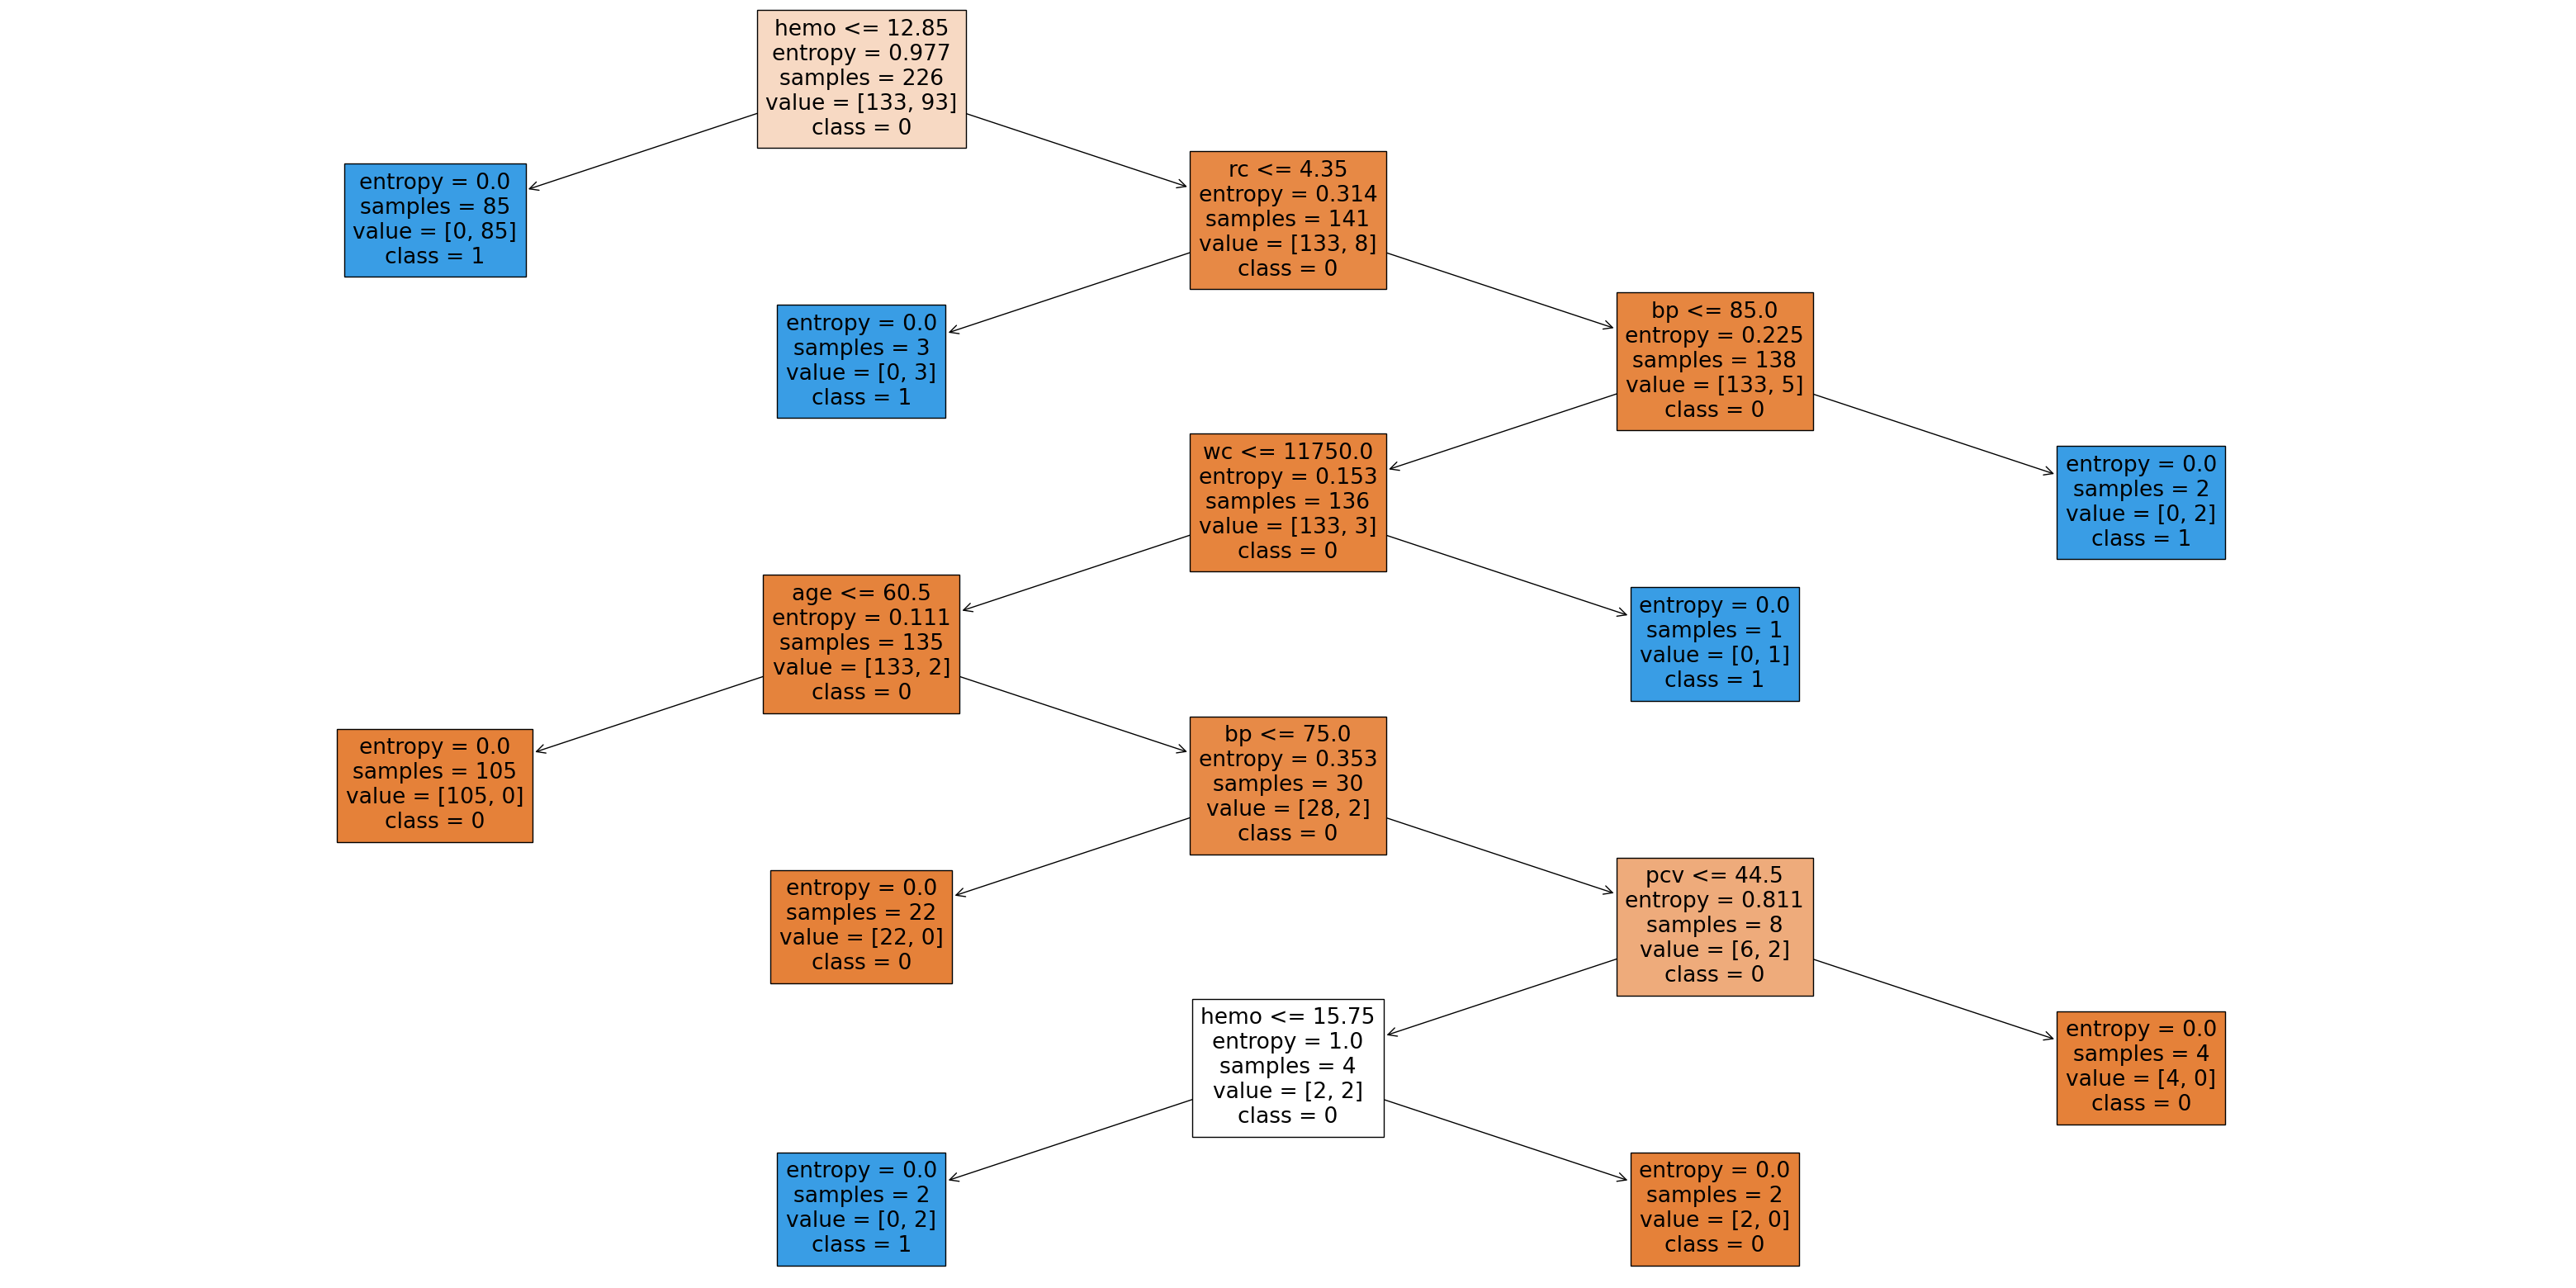

In [6]:
# Implementation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Fitting data
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X, y)

# Creating fiugre
fig = plt.figure(figsize=(40,20))
fig = tree.plot_tree(model, feature_names=feature_names, class_names=['0','1'], filled=True)
plt.savefig('tree.pdf')

<br><br>

### 2. Decision tree - only relevant features
Data used for predictions does not include sod & hemo

In [16]:
# Import packages
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# Import data
data = pd.read_csv('kidney_disease.csv')
print(data)

# Get independent/dependent variable(s)
X, y = data.drop(['ckd','sod','hemo'], axis=1), data[['ckd']]
#print(X) #X is data, without 'ckd' column
#print(y) #y is 'ckd' column only

# Get names of features as list
feature_names = list(X.columns)
#print(feature_names)

      age    bp    sod  pot  hemo  pcv     wc   rc  ckd
0    48.0  70.0  111.0  2.5  11.2   32   6700  3.9    1
1    60.0  90.0  142.0  3.2  12.2   39   7800  4.4    1
2    53.0  90.0  114.0  3.7   9.5   29  12100  3.7    1
3    63.0  70.0  131.0  4.2  10.8   32   4500  3.8    1
4    68.0  70.0  138.0  5.8   9.7   28  12200  3.4    1
..    ...   ...    ...  ...   ...  ...    ...  ...  ...
221  55.0  80.0  150.0  4.9  15.7   47   6700  4.9    0
222  42.0  70.0  141.0  3.5  16.5   54   7800  6.2    0
223  12.0  80.0  137.0  4.4  15.8   49   6600  5.4    0
224  17.0  60.0  135.0  4.9  14.2   51   7200  5.9    0
225  58.0  80.0  141.0  3.5  15.8   53   6800  6.1    0

[226 rows x 9 columns]


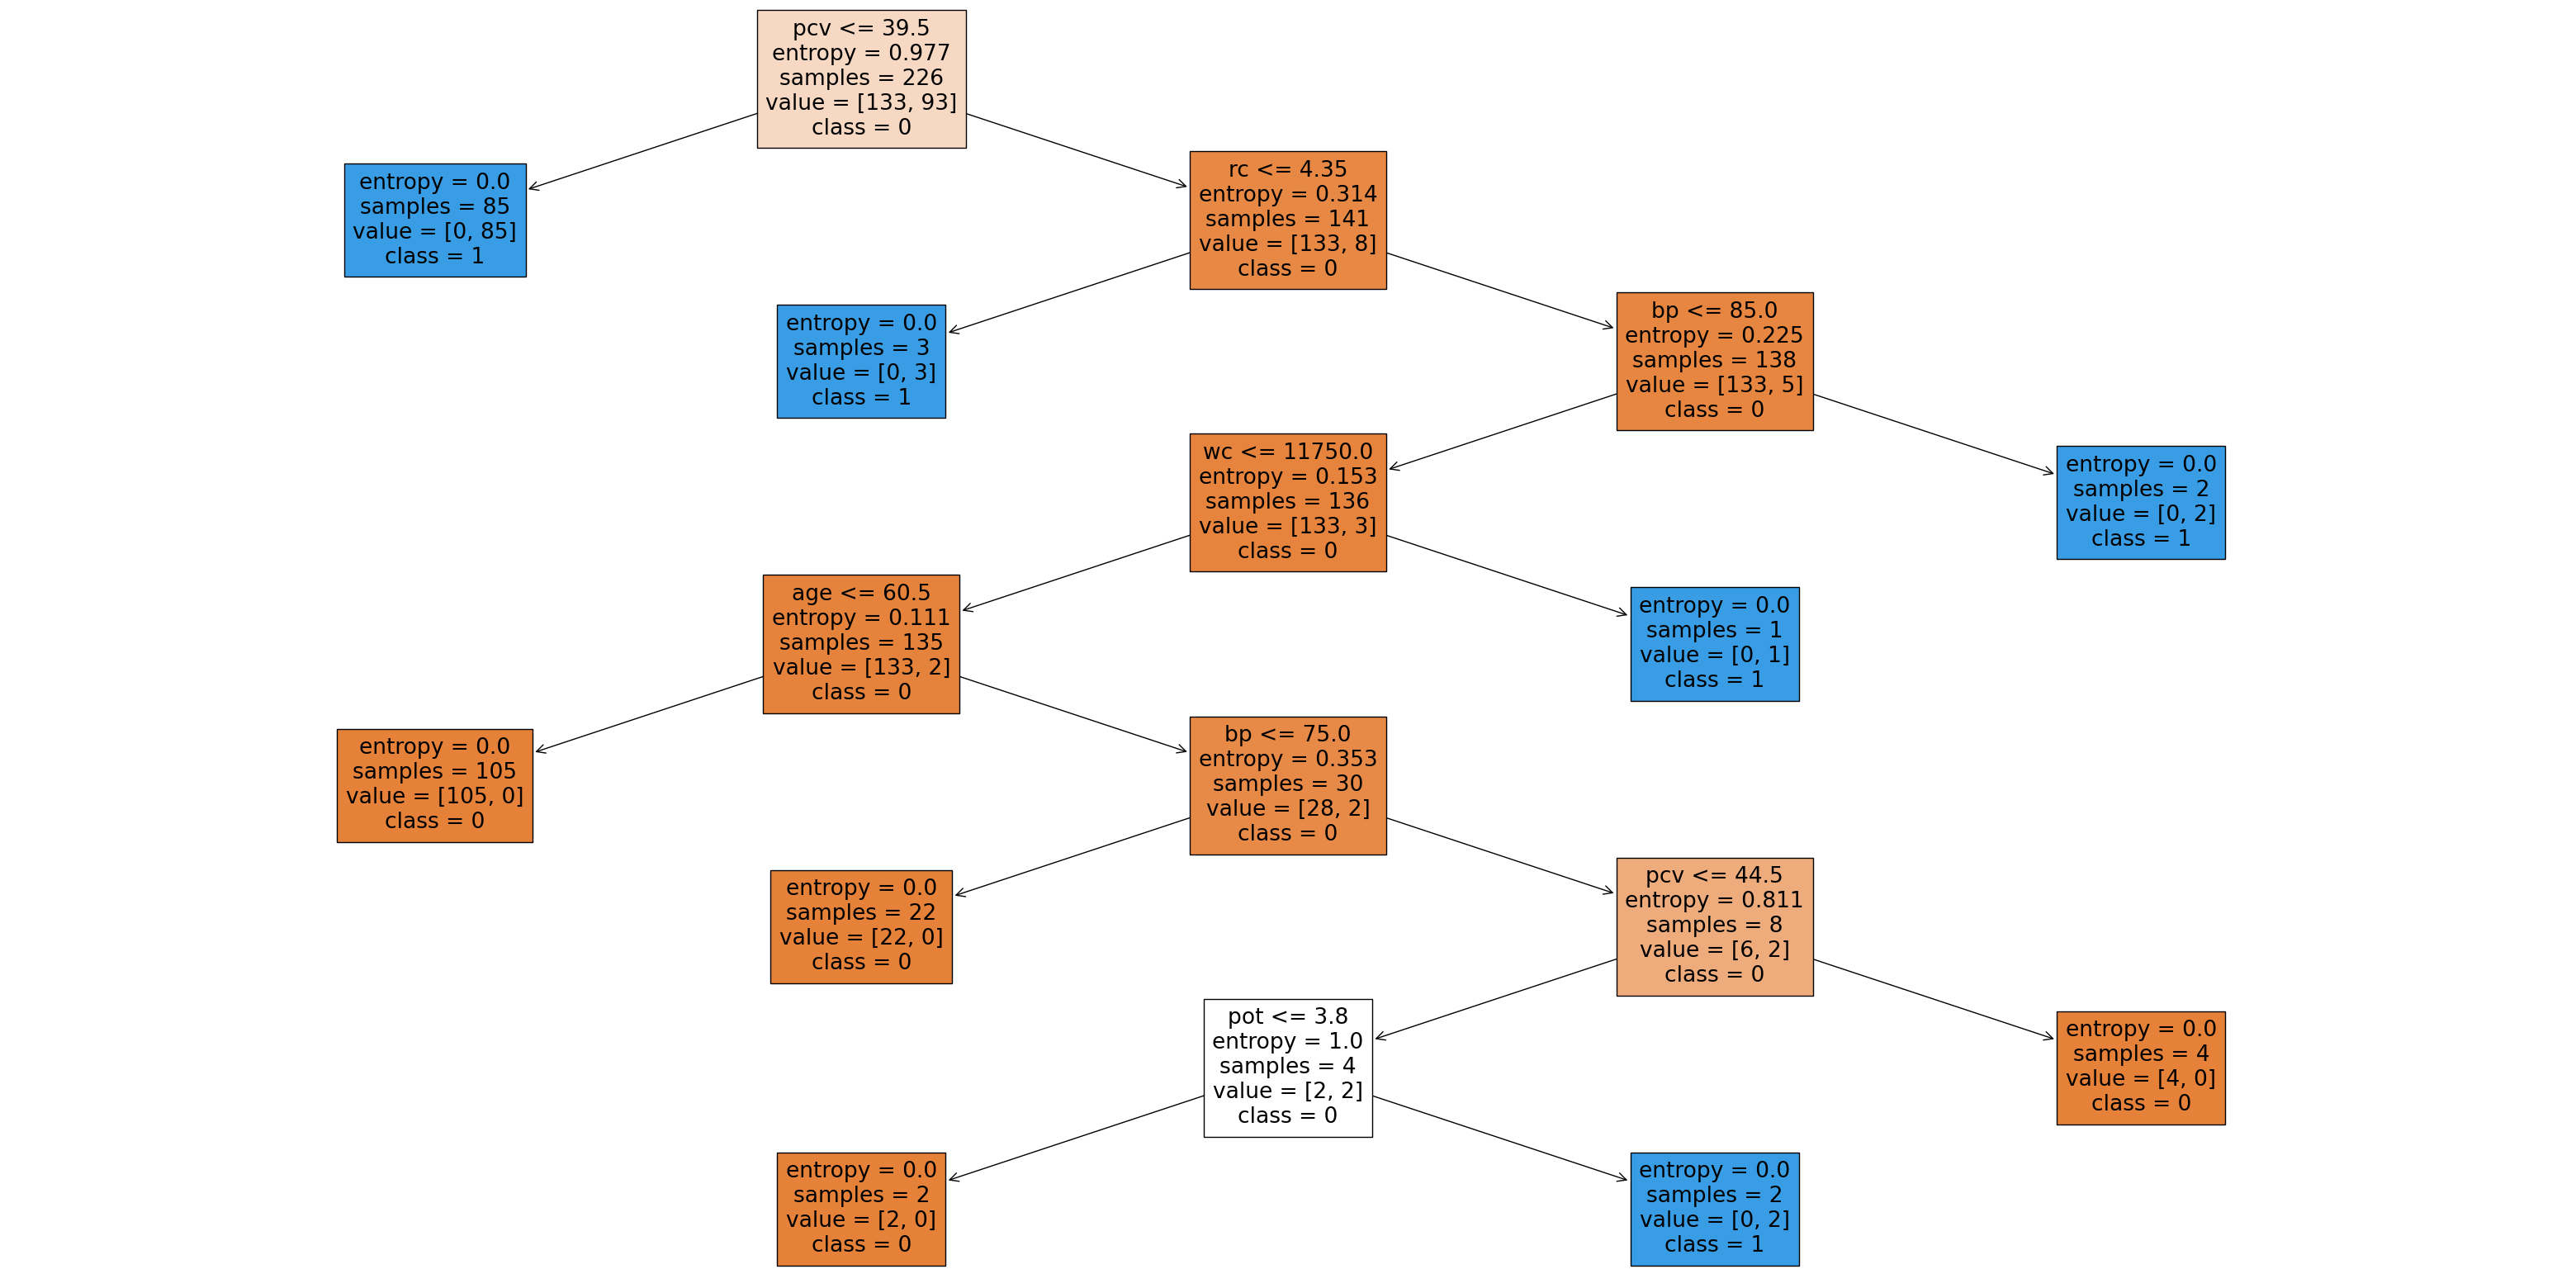

In [17]:
# Implementation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Fitting data
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X, y)

# Creating fiugre
fig = plt.figure(figsize=(40,20))
fig = tree.plot_tree(model, feature_names=feature_names, class_names=['0','1'], filled=True)
plt.savefig('tree.pdf')

In [20]:
# Predictions
import pandas as pd

y_predicted = pd.DataFrame(
    data = [
        [25, 70.0, 4.2, 38, 6600, 4.0],
        [62, 80.0, 2.5, 40, 7200, 5.0]
    ],
    index = ['Person A', 'Person B'],
    columns = feature_names
)
print(y_predicted)

y_predicted = model.predict(y_predicted)
print(y_predicted)

          age    bp  pot  pcv    wc   rc
Person A   25  70.0  4.2   38  6600  4.0
Person B   62  80.0  2.5   40  7200  5.0
[1 0]


<br><br>

## Conclusion
Based on the decision tree, person A is predicted to have chronic kidney disease (ckd = 1). This can be seen in the tree, as person A has a pcv <= 39.5 (38). 

In contrast, person B is predicted to be a healthy individual (ckd = 0). This can be seen in the tree, where:
1. pcv > 39.5 (40)
2. rc > 4.35 (5)
3. bp <= 85.0 (80)
4. wc <= 11750.0 (7200)
5. age > 60.5 (62)
6. bp > 75.0 (80)
7. pcv <= 44.5 (40)

<br><br>

# Question 2

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# load dataset 
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
print(y)
print(min(y))
print(max(y))

scaler = MinMaxScaler()
y = y.reshape(-1,1)
y = scaler.fit_transform(y)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

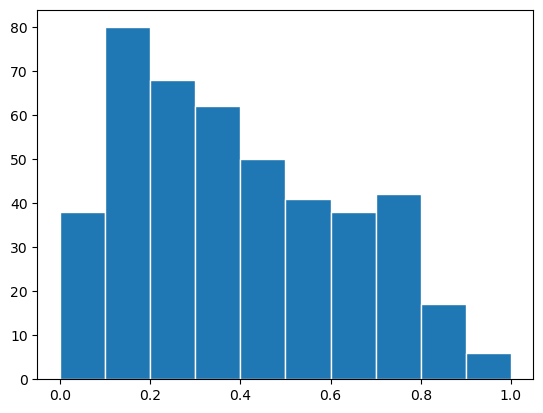

In [34]:
import matplotlib.pyplot as plt
plt.hist(y, edgecolor = "white")

(array([30., 55., 43., 44., 33., 32., 26., 22., 16.,  8.]),
 array([0.        , 0.09844237, 0.19688474, 0.2953271 , 0.39376947,
        0.49221184, 0.59065421, 0.68909657, 0.78753894, 0.88598131,
        0.98442368]),
 <BarContainer object of 10 artists>)

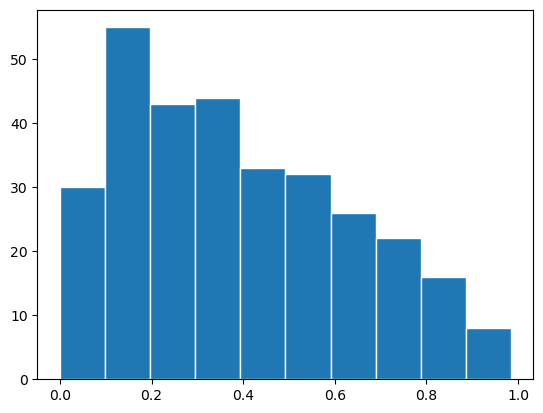

In [127]:
import matplotlib.pyplot as plt
plt.hist(y_train, edgecolor = "white")

In [25]:
load_diabetes().feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [89]:
import tensorflow as tf
tf.random.set_seed(1)

<br>

## 1. Model creation
* 1 hidden layer with 8 neurons
* 70% training, 30% testing
* epochs = 10
* one model with relu, one model without relu (e.g. default/linear)

<br>

### Model with 'relu' activation function

In [128]:
from tensorflow.keras.models import Sequential
reluModel = Sequential()

from tensorflow.keras.layers import Dense, InputLayer

# Input layer
reluModel.add(
    InputLayer(
        input_shape=(10,) #10 features
    )
)

# Hidden layer
reluModel.add(
    Dense(8) # 1 hidden layer with 8 neurons
)

# Output layer
reluModel.add(
    Dense(
        1, 
        activation='relu' #1 output with relu activation
    )
)

# Compile model
reluModel.compile(
    loss='mean_absolute_error',
    #metrics = ['accuracy']
)

# Fitting model
reluModel.fit(X_train, y_train, epochs=10) # epochs argument set to 10


Epoch 1/10
 1/10 [==>...........................] - ETA: 2s - loss: 0.3985

2022-11-22 18:41:58.035948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 15ms/step - loss: 0.3407
Epoch 2/10
10/10 [==============================] - 0s 7ms/step - loss: 0.2910
Epoch 3/10
10/10 [==============================] - 0s 8ms/step - loss: 0.2526
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 0.2216
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1992
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1815
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1683
Epoch 8/10
10/10 [==============================] - 0s 7ms/step - loss: 0.1604
Epoch 9/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1562
Epoch 10/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1522


<br>

### Model without 'relu' activation function

In [129]:
from tensorflow.keras.models import Sequential
linearModel = Sequential()

from tensorflow.keras.layers import Dense, InputLayer

# Input layer
linearModel.add(
    InputLayer(
        input_shape=(10,) #10 features
    )
)

# Hidden layer
linearModel.add(
    Dense(8) # 1 hidden layer with 8 neurons
)

# Output layer
linearModel.add(
    Dense(1) # 1 output, no 'relu' activation, e.g. default (linear) activation
)

# Compile model
linearModel.compile(
    loss='mean_absolute_error',
    #metrics = ['accuracy']
)

# Fitting model
linearModel.fit(X_train, y_train, epochs=10) # epochs argument set to 10


Epoch 1/10
 1/10 [==>...........................] - ETA: 2s - loss: 0.4179

2022-11-22 18:42:07.974533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 14ms/step - loss: 0.3522
Epoch 2/10
10/10 [==============================] - 0s 7ms/step - loss: 0.2922
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.2509
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 0.2193
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1990
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1852
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1765
Epoch 8/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1699
Epoch 9/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1658
Epoch 10/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1618


<br>

## 2 & 3. Model Evaluation & Conclusions

5/5 [==============================] - 0s 4ms/step


2022-11-22 18:42:14.237930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


(array([ 2., 10., 18., 24., 26., 22., 17.,  9.,  3.,  2.]),
 array([0.11639075, 0.16952726, 0.22266378, 0.27580029, 0.32893679,
        0.38207331, 0.43520981, 0.48834634, 0.54148287, 0.59461933,
        0.64775586]),
 <BarContainer object of 10 artists>)

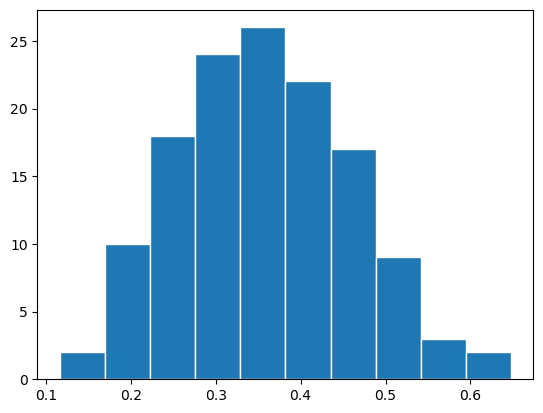

In [130]:
import matplotlib.pyplot as plt
plt.hist(
    reluModel.predict(X_test),
    edgecolor = "white"
)

5/5 [==============================] - 0s 4ms/step


2022-11-22 18:42:16.811117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


(array([ 8., 12., 18., 13., 26., 25., 17.,  8.,  4.,  2.]),
 array([0.15580258, 0.20542465, 0.25504673, 0.30466878, 0.35429087,
        0.40391296, 0.45353502, 0.50315708, 0.5527792 , 0.60240126,
        0.65202332]),
 <BarContainer object of 10 artists>)

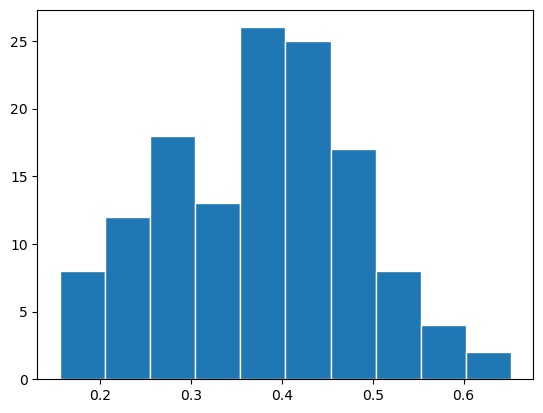

In [131]:
import matplotlib.pyplot as plt
plt.hist(
    linearModel.predict(X_test),
    edgecolor = "white"
)

In [123]:
from sklearn.metrics import mean_absolute_error, accuracy_score

reluPerformance = reluModel.evaluate(X_test, y_test)
linearPerformance = linearModel.evaluate(X_test, y_test)
print('\nrelu performance (MAE) =', reluPerformance)
print('linear performance (MAE) =', linearPerformance)


5/5 [==============================] - 0s 8ms/step - loss: 0.1598

relu performance (MAE) = 0.17660462856292725
linear performance (MAE) = 0.15981779992580414


2022-11-22 17:36:53.684068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 17:36:53.802898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [132]:
relu_MAE = mean_absolute_error(
    y_test,
    reluModel.predict(X_test)
)

linear_MAE = mean_absolute_error(
    y_test,
    linearModel.predict(X_test)
)

print('\nrelu MAE =', relu_MAE)
print('linear MAE =', linear_MAE)

5/5 [==============================] - 0s 2ms/step

relu MAE = 0.16443178488478996
linear MAE = 0.1580140810159075


In [138]:
from sklearn.linear_model import LinearRegression

regressionModel = LinearRegression()
regressionModel.fit(X, y)

print(regressionModel.coef_)
print(regressionModel.intercept_)
print(regressionModel.score(X,y))

[[-0.03118338 -0.74708923  1.61945769  1.01054407 -2.46783688  1.48516829
   0.31477654  0.55159887  2.34041651  0.21067505]]
[0.39605447]
0.5177484222203499


<br>

### 2.
The rectified linear unit, or 'relu', activation function essentially acts to convert all negative values to 0, such as in `f(x) = max(0,x)`. As a result, neurons are not activated in cases where the linear transformation is less than 0. Thus, both 'relu' and the default linear activation may be utilized for regression problems. However, 'relu' is important as it is a non-linear transformation, which is necessary for training certain deep neural networks.

### 3.
Based on the mean absolute error (MAE) performance between the 'relu' and default (linear) activation models, the relu model has a greater performance. As the relu activation model has a lower MAE, which quantifies the difference between the predicted and true values of an observation, there is less difference and thus has a greater predictive performance.

<br>

# Question 4

### 4.1. Creating the model
Complete the code to create and train a neural network model using the training set to predict the digits in images and then report the accuracy on the testing set.

In [8]:
from tensorflow.keras.datasets import mnist

# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
number_of_training_instances = X_train.shape[0]
number_of_testing_instances = X_test.shape[0]

print(number_of_training_instances)
print(number_of_testing_instances)

60000
10000


<Figure size 640x480 with 0 Axes>

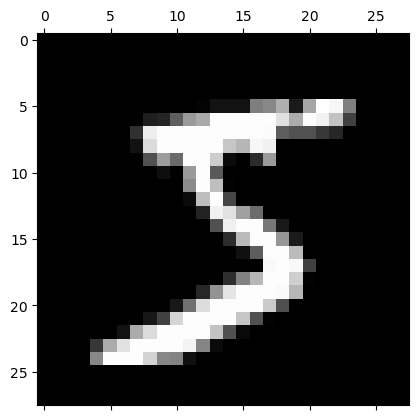

In [9]:
# reshaping dataset
X_train = X_train.reshape((number_of_training_instances, 28*28))
X_test = X_test.reshape((number_of_testing_instances, 28*28))

# plotting example
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(X_train[[0]].reshape(28,28))
plt.show()


In [10]:
print(y_train[0]) # right now, y is not categorical (e.g. prints 5)

# making y categorical
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[0]) # y is now categorical

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

# Setting seed
tf.random.set_seed(1)

# Define model
model = Sequential()

# Input layer
model.add(
    InputLayer(
        input_shape=(784,)
    )
)

# Hidden layer
model.add(
    Dense(5)
)

# Output layer
model.add(
    Dense(10, activation = 'softmax')
)

# Compile model
model.compile(
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Fit model
model.fit(X_train, y_train, epochs = 10)


Epoch 1/10
   6/1875 [..............................] - ETA: 18s - loss: 69.5994 - accuracy: 0.2083  

2022-11-22 08:25:58.081214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 15s 8ms/step - loss: 6.0501 - accuracy: 0.7239
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 1.3540 - accuracy: 0.8261
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5406 - accuracy: 0.8612
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4661 - accuracy: 0.8693
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4633 - accuracy: 0.8708
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4591 - accuracy: 0.8726
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4609 - accuracy: 0.8728
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4593 - accuracy: 0.8738
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4579 - accuracy: 0.8738
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4589

In [13]:
# Performance
performance = model.evaluate(X_test, y_test)
print(performance)

313/313 [==============================] - 2s 7ms/step - loss: 0.4728 - accuracy: 0.8757
[0.47277432680130005, 0.875700056552887]


<br>
The model has an accuracy of approximately 0.8757 (87.57%). 

<br><br><br>

### 4.2. Saving the model
Save the model in a file with the name ‘digits model.h5’.

In [15]:
model.save('digits model.h5')